In [1]:
import cv2 
import numpy as np
import glob
import os
from itertools import combinations 
from itertools import product
import random
import matplotlib.pyplot as plt
from random import randrange
import sys
#apt install python-pydot python-pydot-ng graphviz

In [2]:
!{sys.executable} -m pip install pydot
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install graphviz

     |################################| 278 kB 2.9 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=a12371d20e1417ec0fd5a2317509b52e254169267c759b5815208db912dad887
  Stored in directory: /root/.cache/pip/wheels/1f/5c/ba/f931f74fcac8f48b18ae597279203b1c1f92fc76249c2b6f66
Successfully built pydotplus


In [3]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, MaxPooling2D, Convolution2D, Dropout, Input, Flatten,Conv2D,Conv2DTranspose,Lambda,concatenate,GlobalMaxPooling2D,Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model,Sequential
#from keras.initializers.h as 
from tensorflow.python.keras.utils.vis_utils import plot_model
#from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2 
from pandas import read_excel
import pydot
#pip install xlrd

In [4]:
path_input_images =  '/tensorflow/IITD_Database/'

In [5]:
mask_path  = '/tensorflow/iit_unet/mask_data/'

In [6]:
# data = read_excel(data_in_labels_path, sheetname='Sheet1')

In [7]:
# data.head()

In [8]:
def change_name(name):
    d = name.split('/')
    mask_name = 'frame' + '_' + d[0]+'_'+d[1] +'.png'
    return mask_name


In [9]:
#rows = data[data['image_name']=='001_04.bmp']

In [10]:
#rows['Y1p'].iloc[0]

In [11]:
def read_simaese_parametric_data(path_input_images, folder_name_list_batch,mask_path,batch_size):
    
    
    h  = 128
    w = 128 
    c = 1
    factor  = 4
    
    train_out1 = np.zeros((factor*batch_size,h,w,c),'float')
    train_out2 = np.zeros((factor*batch_size,h,w,c),'float')
    train_seg1 = np.zeros((factor*batch_size,h,w,1),'float')
    train_seg2 = np.zeros((factor*batch_size,h,w,1),'float')
    
    out1= np.zeros((factor*batch_size,h,w,c),'float')
    out2= np.zeros((factor*batch_size,h,w,c),'float')
    
    seg1= np.zeros((factor*batch_size,h,w,1),'float')
    seg2= np.zeros((factor*batch_size,h,w,1),'float')
    
    pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5], 2)))
    pos_comb2 = np.array(list(combinations([6, 7, 8, 9, 10], 2)))

    neg_comb1 = np.array(list(product([2,3,4,5], [8,9,10])))
    #
    count = 0
    y = []
    
    for folder_name in folder_name_list_batch:

        for j in range (len(pos_comb1)-9):
           
            i = random.randint(0, 9)
        
            ## read the image from folder in postive combination 
            #print('pos_combi =' + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            img1_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            
            
            img1_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')
#             print('pos_combi =' + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')

            img1_0 = cv2.resize(img1_0[:,:,0],(h,w))    #c = 1
            img1_1 = cv2.resize(img1_1[:,:,0],(h,w))
            ##get the correspondance segmentation data 
            name1 = folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)
            name2 = folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)
            seg1_0 = cv2.imread(mask_path + change_name(name1))
            seg1_1 = cv2.imread(mask_path + change_name(name2))
            ###############################################################
            seg1_0 = cv2.cvtColor(seg1_0,cv2.COLOR_BGR2GRAY)
            seg1_1 = cv2.cvtColor(seg1_1,cv2.COLOR_BGR2GRAY)
            
            seg1_0 = cv2.resize(seg1_0,(h,w))
            seg1_1 = cv2.resize(seg1_1,(h,w))
            
            ## save the image data to out and out2         
            out1[count]  = np.expand_dims(img1_0,axis=2) #img1_0
            out2[count]  = np.expand_dims(img1_1,axis=2) #img1_1
            seg1[count]  = np.expand_dims(seg1_0,axis=2)
            seg2[count]  = np.expand_dims(seg1_1,axis=2)
            
            #save the segmentation data to lable 

            
            ## posive combination assigning 0 to last clolumn
            y.append(1.0)
            
            ## increament the count
            count = count+1
            
            

            img2_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb2[i][0]).zfill(2)+'.bmp')
            img2_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb2[i][1]).zfill(2)+'.bmp')
            img2_0 = cv2.resize(img2_0[:,:,0],(h,w)) ## C = 1
            img2_1 = cv2.resize(img2_1[:,:,0],(h,w))  ## c = 1
            
            name1 = folder_name + '/'+ str(pos_comb2[i][0]).zfill(2)
            name2 = folder_name + '/'+ str(pos_comb2[i][1]).zfill(2)
            seg2_0 = cv2.imread(mask_path + change_name(name1))
            seg2_1 = cv2.imread(mask_path + change_name(name2)) 
            
            seg2_0 = cv2.cvtColor(seg2_0,cv2.COLOR_BGR2GRAY)
            seg2_1 = cv2.cvtColor(seg2_1,cv2.COLOR_BGR2GRAY)
            seg2_0 = cv2.resize(seg2_0,(h,w))
            seg2_1 = cv2.resize(seg2_1,(h,w))
            out1[count]  = np.expand_dims(img2_0,axis=2)#img2_0
            out2[count]  = np.expand_dims(img2_1,axis=2)#img2_1
            seg1[count]  = np.expand_dims(seg2_0,axis=2)
            seg2[count]  = np.expand_dims(seg2_1,axis=2)          

            y.append(1.0)
            count = count+1

            
            ## negative combination left vs right iris for same person 
            folder_name2 = str(int(folder_name) + 1).zfill(3)
#             print('neg_combi =' + folder_name2 + '/'+ str(neg_comb1[i][1]).zfill(2)+'.bmp')
#             print('neg_combi =' + folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)+'.bmp')
            img3_0 = cv2.imread(path_input_images + folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)+'.bmp')
            img3_1 = cv2.imread(path_input_images + folder_name2 + '/'+ str(neg_comb1[i][1]).zfill(2)+'.bmp')
            img3_0 = cv2.resize(img3_0[:,:,0],(h,w))  #c = 1
            img3_1 = cv2.resize(img3_1[:,:,0],(h,w))
            
            name1 = folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)
            name2 = folder_name + '/'+ str(neg_comb1[i][1]).zfill(2)
            seg3_0 = cv2.imread(mask_path + change_name(name1))
            seg3_1 = cv2.imread(mask_path + change_name(name2))
            
            seg3_0 = cv2.cvtColor(seg3_0,cv2.COLOR_BGR2GRAY)
            seg3_1 = cv2.cvtColor(seg3_1,cv2.COLOR_BGR2GRAY)
            
            seg3_0 = cv2.resize(seg3_0,(h,w))
            seg3_1 = cv2.resize(seg3_1,(h,w))
            
            out1[count]  = np.expand_dims(img3_0,axis=2) #img3_0
            out2[count]  = np.expand_dims(img3_1,axis=2) #img3_1
            seg1[count]  = np.expand_dims(seg3_0,axis=2)
            seg2[count]  = np.expand_dims(seg3_1,axis=2)
            ## assigning 1 to negative combinations (left vs right image)
            y.append(0.0)
            count = count+1

            
            ## creating the negativ combination from diffrent person 
            folder_name1 = str(int(folder_name) + 3).zfill(3) 
            img4_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            img4_1 = cv2.imread(path_input_images + folder_name1 + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')

            img4_0 = cv2.resize(img4_0[:,:,0],(h,w))
            img4_1 = cv2.resize(img4_1[:,:,0],(h,w))
            name1 = folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)
            name2 = folder_name1 + '/'+ str(pos_comb1[i][1]).zfill(2)
            seg4_0 = cv2.imread(mask_path + change_name(name1))
            seg4_1 = cv2.imread(mask_path + change_name(name2))

            seg4_0 = cv2.cvtColor(seg4_0,cv2.COLOR_BGR2GRAY)
            seg4_1 = cv2.cvtColor(seg4_1,cv2.COLOR_BGR2GRAY)        

            seg4_0 = cv2.resize(seg4_0,(h,w))
            seg4_1 = cv2.resize(seg4_1,(h,w))
            
            out1[count]  = np.expand_dims(img4_0,axis=2)#img4_0
            out2[count]  = np.expand_dims(img4_1,axis=2) #img4_1
            seg1[count]  = np.expand_dims(seg4_0,axis=2)
            seg2[count]  = np.expand_dims(seg4_1,axis=2)
            y.append(0.0)
            count = count+1
            #print(i)
            
    ## this padding the data set for size 256x512 to maintain spect rationa nd segmentation parameters 
    train_out1 = out1
    train_out2 = out2 
    
    train_seg1 = seg1
    train_seg2 = seg2  
    
    
#     train_out1[:,0:240,0:320,:] = out1
#     train_out2[:,0:240,0:320,:] = out2 
    
#     train_seg1[:,0:240,0:320,:] = seg1
#     train_seg2[:,0:240,0:320,:] = seg2     
    
    return train_out1,train_out2,train_seg1,train_seg2,y
        #print(count) 

In [12]:
#print(np.array(list(product([2,3,4,5], [8,9,10]))))
print(np.array(list(combinations([1, 2, 3, 4, 5], 2))))


[[1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 3]
 [2 4]
 [2 5]
 [3 4]
 [3 5]
 [4 5]]


In [13]:
#fileList = listOfFiles     
def imageLoader(path_input_images,folder_name_list,mask_path,batch_size):

    L = len(folder_name_list)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = randrange(L-batch_size)
        batch_end = batch_start + batch_size

        if (batch_end < L):
            limit = min(batch_end, L)
            train_out1,train_out2,train_seg1,train_seg2,y_class = read_simaese_parametric_data(path_input_images,folder_name_list[batch_start:limit],mask_path,batch_size)
            train_out1 = train_out1/255.
            train_out2 = train_out2/255.
            train_seg1 = train_seg1/255.
            train_seg2 = train_seg2/255.
            batch_start = batch_end
            batch_end = batch_start + batch_size
            #print(batch_start,batch_end)
            ## just for the test 
            #yield (train_out2,train_seg2)
            ## original
            yield ([train_out1,train_out2],[train_seg1,train_seg2,np.array(y_class)]) #a tuple with two numpy arrays with batch_size samples     

In [14]:
folder_names = np.sort(os.listdir(path_input_images))
folder_name_list = folder_names[0:120] 
folder_name_list_test = folder_names[120:220]
print(len(folder_name_list_test))

100


### Function to check the GT and loader 

In [15]:
def draw_haugh_circle(img_L,img_R, hough_param):        
    
    
    print('pair_classification =', int(hough_param[12]))
    cimg = img_L.copy()
    cv2.circle(cimg,(int(hough_param[0]),int(hough_param[1])),int(hough_param[2]),(0,255,0),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[0]),int(hough_param[1])),2,(0,255,0),3)

                #for i in circles_inner[0,:]:
                # draw the outer circle
    cv2.circle(cimg,(int(hough_param[3]),int(hough_param[4])),int(hough_param[5]),(0,0,255),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[3]),int(hough_param[4])),2,(0,0,255),3)
    plt.title('left_image')
    plt.imshow(cimg)
    plt.show()
    
    
    cimg = img_R.copy()
    cv2.circle(cimg,(int(hough_param[6]),int(hough_param[7])),int(hough_param[8]),(0,255,0),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[6]),int(hough_param[7])),2,(0,255,0),3)

                #for i in circles_inner[0,:]:
                # draw the outer circle
    cv2.circle(cimg,(int(hough_param[9]),int(hough_param[10])),int(hough_param[11]),(0,0,255),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[9]),int(hough_param[10])),2,(0,0,255),3)
    plt.title('right_image')
    plt.imshow(cimg)
    plt.show()

In [16]:
g=0
while (g < 200):

    Out = next(imageLoader(path_input_images,folder_name_list,mask_path,4))
    g = g+1


In [17]:
images_L_R = Out[0]
image_L = images_L_R[0]
image_R = images_L_R[1]

mask_L_R_class = Out[1]

mask_L = mask_L_R_class[0]
mask_R = mask_L_R_class[1]
y = mask_L_R_class[2]
print(y[0])
print(image_L.shape)

1.0
(16, 128, 128, 1)


# mask_L.shape

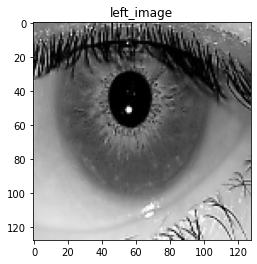

In [18]:
plt.title('left_image')
plt.imshow(image_R[1],cmap='gray')
plt.show()

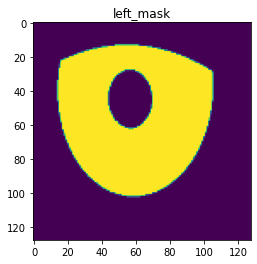

In [19]:
plt.title('left_mask')
plt.imshow(np.squeeze(mask_R[1]))
plt.show()

In [20]:
#pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5], 2)))
#pos_comb2 = np.array(list(combinations([6, 7, 8, 9, 10], 2)))

#neg_comb1 = np.array(list(product([2,3,4,5], [8,9,10])))
#print(neg_comb1)

In [16]:
folder_names = np.sort(os.listdir(path_input_images))

print(folder_names[0:20])

['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020']


In [17]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [18]:
initialize_weights = 'he_normal'
initialize_bias = 'he_normal'

In [19]:
def base_network_unet_siamese():
    input = Input(shape=(128,128,1), name="base_input")
    n_filters=16
    dropout=.1
    batchnorm=True
    c1 = conv2d_block(input,n_filters*1,kernel_size=3,batchnorm=batchnorm)     
    p1 = MaxPooling2D((2,2))(c1)           # (h/2,w/2,16)
    p1 = Dropout(dropout)(p1) 

    c2 = conv2d_block(p1,n_filters*2,kernel_size=3,batchnorm=batchnorm)
    p2 = MaxPooling2D((2,2))(c2)  # (h/4,w/4,32)
    p2 = Dropout(dropout)(p2) 

    c3 = conv2d_block(p2,n_filters*4,kernel_size=3,batchnorm=batchnorm)
    p3 = MaxPooling2D((2,2))(c3)  # (h/8,w/8,64)
    p3 = Dropout(dropout)(p3) 

    c4 = conv2d_block(p3,n_filters*8,kernel_size=3,batchnorm=batchnorm)
    p4 = MaxPooling2D((2,2))(c4)  # (h/16,w/16,128)
    p4 = Dropout(dropout)(p4) 

    c5 = conv2d_block(p4,n_filters*16,kernel_size=3,batchnorm=batchnorm)      # (h/16,w/16,256)


    print("encoder done")


    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)  # (h/8,w/8,128)
    u6 = concatenate([u6, c4])   # (h/8,w/8,128)
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)     # (h/8,w/8,128)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)  # (h/4,w/4,64)
    u7 = concatenate([u7, c3])   # (h/8,w/8,128)
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)     # (h/4,w/4,64)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)  # (h/2,w/2,32)
    u8 = concatenate([u8, c2])   # (h/2,w/2,32)
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters *2 , kernel_size = 3, batchnorm = batchnorm)     # (h/2,w/2,32)

    u9 = Conv2DTranspose(n_filters, (3, 3), strides = (2, 2), padding = 'same')(c8)  # (h,w,16)
    u9 = concatenate([u9, c1])   # (h,w,16)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters, kernel_size = 3, batchnorm = batchnorm)     # (h,w,16)    


    print("decoder done . . .  siamese network will start" )
    X_outputs = Conv2D(1,(1,1),activation='sigmoid',name='seg_out')(c9)
    
    c10 = Conv2D(64, (10,10), activation='relu',
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4))(c9)
    p10 = MaxPooling2D()(c10)
    c11 = Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p10)
    p11 = MaxPooling2D()(c11)
    c12 = Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p11)
    p12 = MaxPooling2D()(c12)
    c13 = Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p12)
    a1 = Flatten()(c13)
    a2 = Dense(128, activation='relu',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias)(a1)  
    
    print("simaese model done")
    return Model(inputs=input, outputs=[X_outputs,a2])
    

In [20]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

encoder done
decoder done . . .  siamese network will start
simaese model done


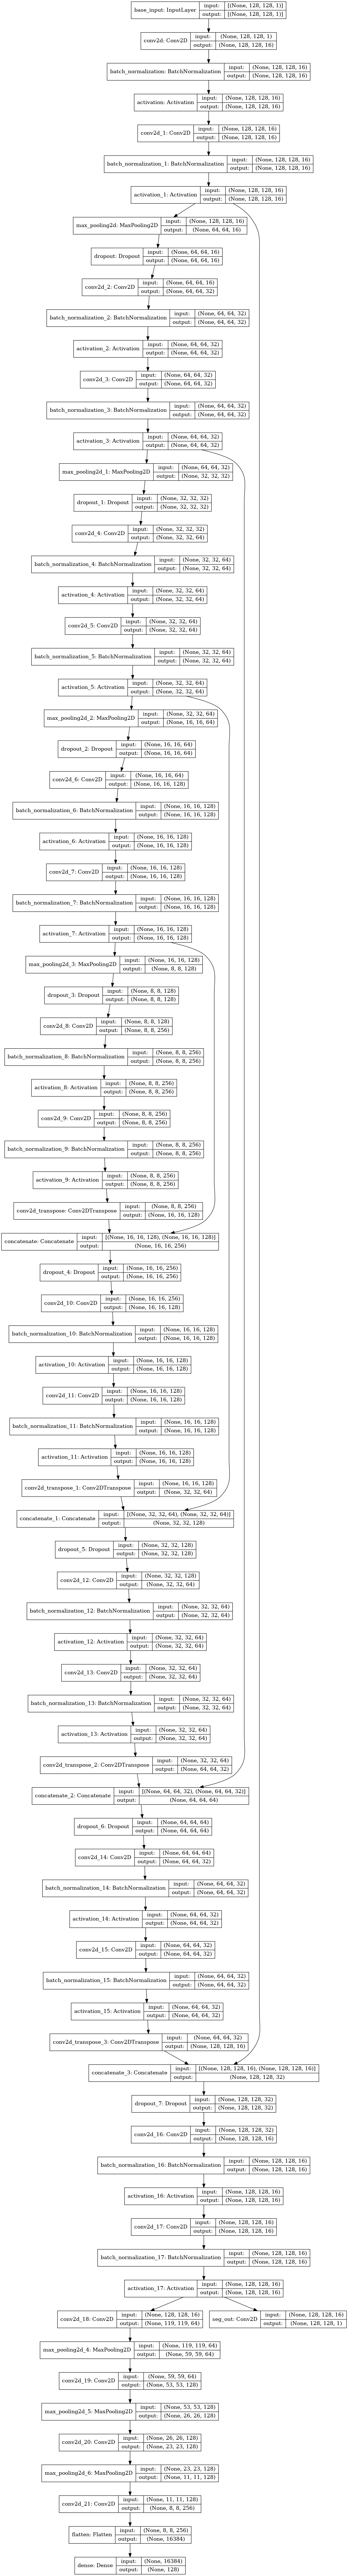

In [21]:
base_network = base_network_unet_siamese()
plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='base-model.png')

In [23]:
# create the left input and point to the base network
input_a = Input(shape=(128,128,1), name="left_input")
seg_a , vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(128,128,1), name="right_input")
seg_b, vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output_siasmese = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], [seg_a,seg_b,output_siasmese])


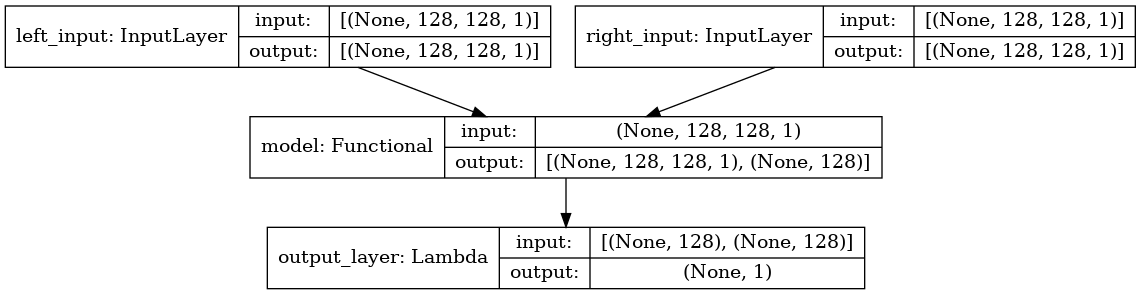

In [24]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [25]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [30]:
#optimizer = keras.optimizers.Adam(lr = 0.0001)


#siamese_model.compile(loss=custom_loss, optimizer=optimizer, metrics = ['mae', 'acc'])
model.compile(loss = {'model' : "binary_crossentropy",
                      'model_1' : "binary_crossentropy",
                      'output_layer' : contrastive_loss_with_margin(margin=1)
                     },optimizer='Adam', metrics = ['mae', 'acc'])

In [31]:
#steps_per_epoch = train_length // batch_size
batch_size = 4
steps_per_epoch = len(folder_name_list) // batch_size
validation_steps = len(folder_name_list_test) // batch_size

In [32]:

# history = siamese_model.fit_generator(imageLoader(path_input_images,folder_name_list,batch_size),steps_per_epoch,
#                     validation_data = imageLoader(path_input_images,folder_name_list_test,batch_size), 
#                     validation_steps=validation_steps, epochs=50)

In [33]:
history = model.fit_generator(imageLoader(path_input_images,folder_name_list,mask_path,batch_size),steps_per_epoch,
                    validation_data = imageLoader(path_input_images,folder_name_list_test,mask_path,batch_size), 
                    validation_steps=validation_steps, epochs=60)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
30/30 [==============================] - 157s 5s/step - loss: 5.4126 - model_loss: 0.8081 - model_1_loss: 0.8097 - output_layer_loss: 3.3610 - model_mae: 0.5208 - model_acc: 0.4274 - model_1_mae: 0.5217 - model_1_acc: 0.4231 - output_layer_mae: 2.5480 - output_layer_acc: 0.3662 - val_loss: 1.6729 - val_model_loss: 0.5806 - val_model_1_loss: 0.5864 - val_output_layer_loss: 0.1061 - val_model_mae: 0.4209 - val_model_acc: 0.6243 - val_model_1_mae: 0.4237 - val_model_1_acc: 0.6320 - val_output_layer_mae: 0.9305 - val_output_layer_acc: 0.1075
Epoch 2/60
30/30 [==============================] - 162s 5s/step - loss: 1.8676 - model_loss: 0.6659 - model_1_loss: 0.6769 - output_layer_loss: 0.1263 - model_mae: 0.4556 - model_acc: 0.5625 - model_1_mae: 0.4603 - model_1_acc: 0.5538 - output_layer_mae: 0.7856 - output_layer_acc: 0.1516 - val_loss: 1.7966 - val_model_loss: 0.6334 - val_model_1_loss: 0.6391 - val_output_layer_loss: 0.1314 - val_model_mae: 0.4487 - val_model_acc: 0.6647 - va

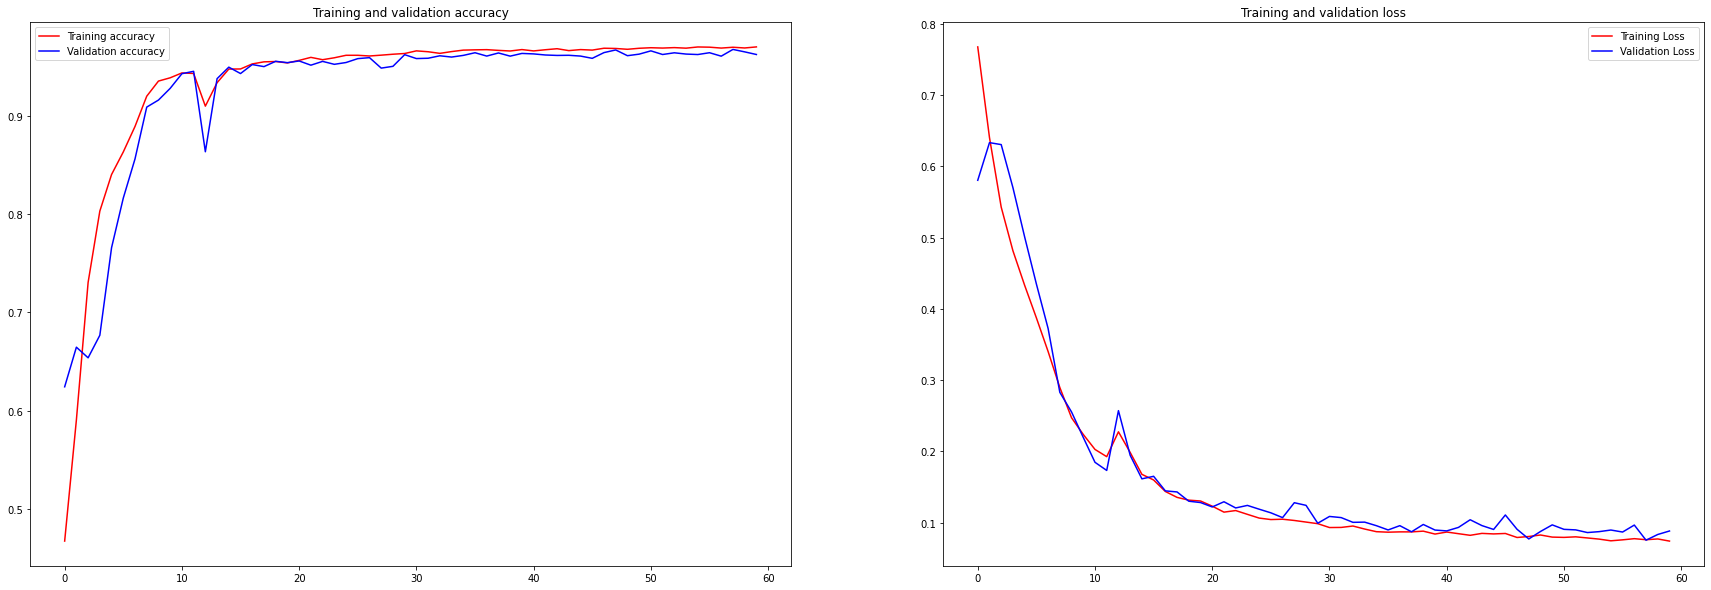

In [34]:
import matplotlib.pyplot as plt
# Let's take a look at how we did during training.
acc = history.history['model_acc']
val_acc = history.history['val_model_acc']

loss = history.history['model_loss']
val_loss = history.history['val_model_loss']
epochs = range(len(acc))

# Accuracy
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

# Loss
ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.show()

In [26]:
model_save_path = '/tensorflow/siamese_model/siamese_unet_pixel_seg_60epoch_120_train_test.h5'
#model.save(model_save_path)

In [27]:
model = load_model(model_save_path,custom_objects={'contrastive_loss':contrastive_loss_with_margin(margin=1)})

In [28]:
Out = next((imageLoader(path_input_images,folder_name_list_test,mask_path,1)))

In [29]:
images_L_R = Out[0]
image_L = images_L_R[0]
image_R = images_L_R[1]

mask_L_R_class = Out[1]

mask_L = mask_L_R_class[0]
mask_R = mask_L_R_class[1]
y = mask_L_R_class[2]
print(y[0])
print(image_L.shape)
#plt.title('left_mask')
#plt.imshow(np.squeeze(mask_R[1]))
#plt.imshow(image_R[1])
#plt.show()

1.0
(4, 128, 128, 1)


In [30]:




preds = model.predict([image_L,image_R])





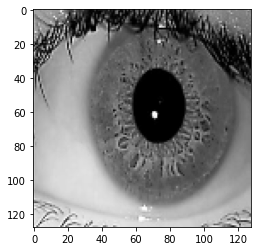

In [31]:

#plt.imshow(np.squeeze(mask_R[1]))
plt.imshow(image_R[1],cmap='gray')
plt.show()

In [32]:
out_image = np.squeeze(preds[1][1])
preds[0].shape

(4, 128, 128, 1)

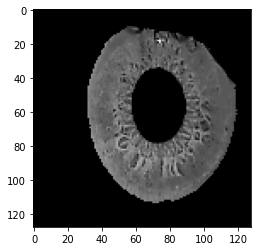

In [33]:

dummy_image = image_R[1].copy() 
dummy_image[out_image<.5] = 0
plt.imshow(dummy_image,cmap='gray')
plt.show()

In [34]:
y = preds[2]
print(y)

[[0.62144405]
 [0.04209832]
 [0.9532168 ]
 [0.684158  ]]


## Test data for model 

In [35]:
test_out1,test_out2,test_seg1,test_seg2,y_class = read_simaese_parametric_data(path_input_images,folder_name_list[0:100],mask_path,100)

In [36]:
test_out1 = test_out1/255.0
test_out2 = test_out2/255.0
# test_seg1 = test_seg1/255.0
# test_seg2 = test_seg2/255.0

In [37]:
[test_seg_out1,test_seg_out2, y_pred] = model.predict([test_out1,test_out2])

In [38]:
test_seg2.shape

(400, 128, 128, 1)

In [39]:
def show_images(test_out1,test_seg_out1):
    #num_images = len(test_seg_out1)
    num_images = 20
    for i in range(0,num_images,4):
        dummy_image = np.squeeze(test_out1[i]).copy()
        seg_img = np.squeeze(test_seg_out1[i])
        dummy_image[seg_img<.5] = 0
        plt.imshow(np.squeeze(test_out1[i]),cmap='gray')
        plt.show()
        plt.imshow(dummy_image,cmap='gray')
        plt.show()

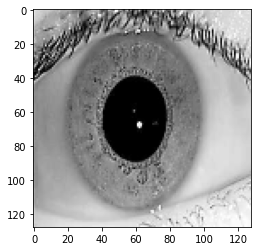

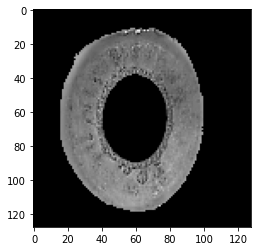

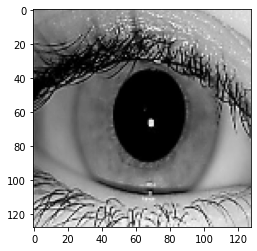

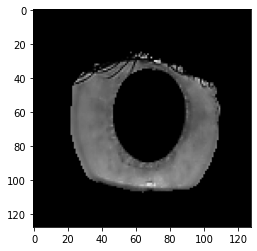

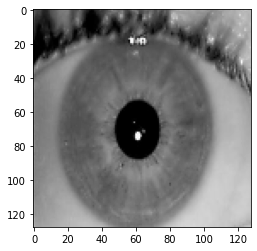

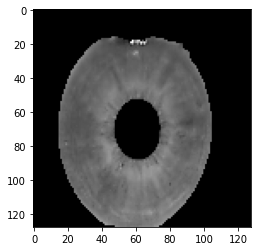

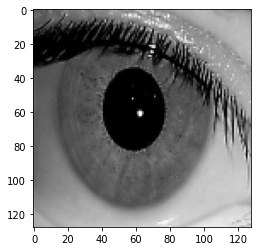

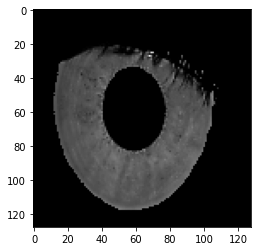

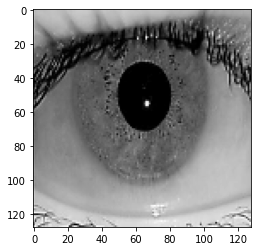

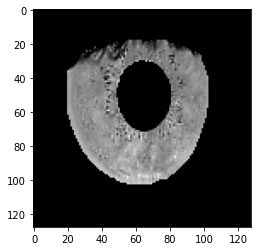

In [40]:
show_images(test_out2,test_seg_out2)

In [50]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [51]:
compute_accuracy(y_class, y_pred)      ## trained on 120 images and tested on 100 persons 

0.9875

In [41]:
!{sys.executable} -m pip install -U scikit-learn scipy

     |################################| 22.2 MB 12.2 MB/s eta 0:00:01     |############################    | 19.6 MB 11.1 MB/s eta 0:00:01
     |################################| 303 kB 11.3 MB/s eta 0:00:01


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_class, y_pred.ravel() < 0.5)                      ##   [TN , FP]
                                                                     ##     [FN , TP] 

array([[200,   0],
       [  5, 195]])